Followed this tutorial: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-1-fb6ea90dd60b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
series = pd.read_csv('/content/drive/MyDrive/Time-series anomaly detection/shampoo.csv')

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


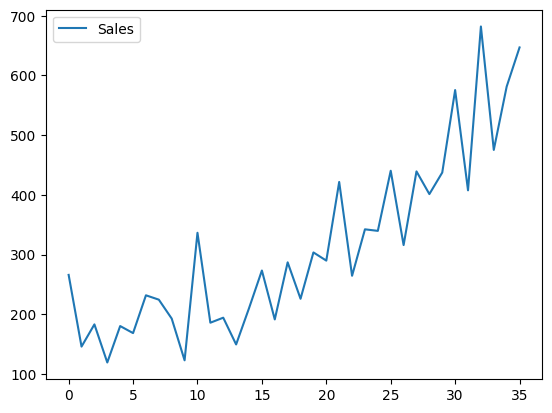

In [ ]:
print(series.head())
series.plot()
plt.show()

<ipython-input-13-a04c7d78201a>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series1 = pd.read_csv('/content/drive/MyDrive/Time-series anomaly detection/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


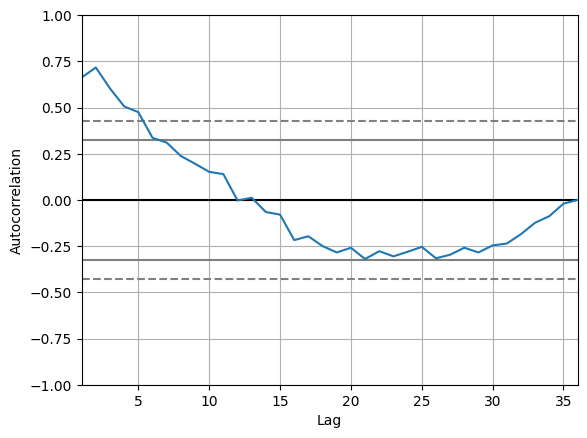

In [ ]:
series1 = pd.read_csv('/content/drive/MyDrive/Time-series anomaly detection/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series1)
plt.show()

We can see that there is a positive correlation with the first 10-12 lags that is perhaps significant for the first 5 lags. This provides a hint: initiating the AR parameter of our model with a value of 5 could be beneficial starting point

**Now let's build the ARIMA Model:**

**Model Definition:** initialize the ARIMA model by invoking ARIMA() and specifing the p, d, and q parameters

**Model Training:** Train the model on the dataset using the fit() method

**Making Predicitions:** generate forecasts by utilizing the predict() function and designating the desired time or indices.

In [ ]:
print(series1.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [ ]:
#In this example, let's employ ARIMA(5,1,0) configurations

series1.index = series1.index.to_period('M')

#Fit the model
model = ARIMA(series1, order=(5,1,0))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 31 Jan 2024   AIC                            408.969
Time:                        16:17:35   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

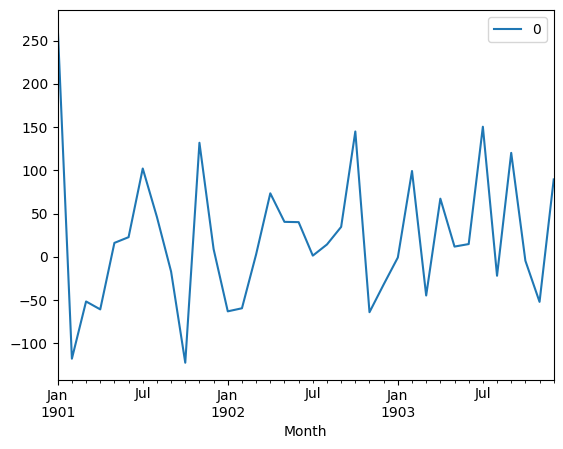

In [ ]:
#Line plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

The image above is a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

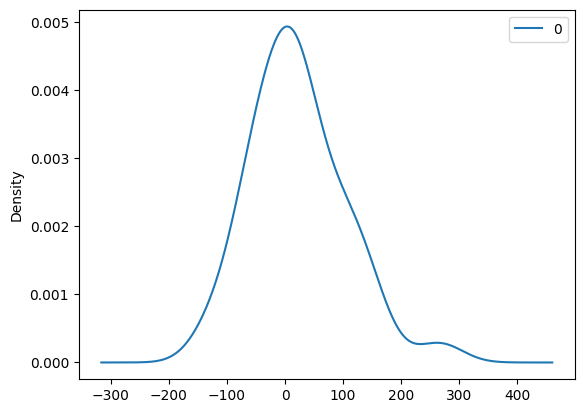

In [ ]:
#Density plot of residuals
residuals.plot(kind='kde')
plt.show()

Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centred on zero.

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

***Rolling Forecast ARIMA Model ***

- Can be used to forecast future time points
- In a rolling forecast, the model is retrained as new data becomes available, allowing for more accurate and adaptive predictions.
- We can use the predict() function on the ARIMAResults object. The function requires the index of the time steps to make predictions are arguments. These indexes are relative to the start of the training dataset used to make predictions.

In [ ]:
#Set the typ argument to 'levels' to revert any differencing and return predictions to the original scale
#For a simpler one-step forecast, employ the forecast() function
#Use train_test_split(): use the train set to fit the model and the test set to generate a prediction for each element in the test set

X = series1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
print(X)

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [ ]:
print(train)

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5])

In [ ]:
print(test)

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [ ]:
print(history)

[266.0, 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287.0, 226.0, 303.6, 289.9, 421.6, 264.5]


In [ ]:
#Walk-forward validation

for time in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[time]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


In [ ]:
#Evaluating forecasts

#This is the final root mean squared error score (RMSE) for the predictions, providing a point of comparision for other ARIMA configurations
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 89.021


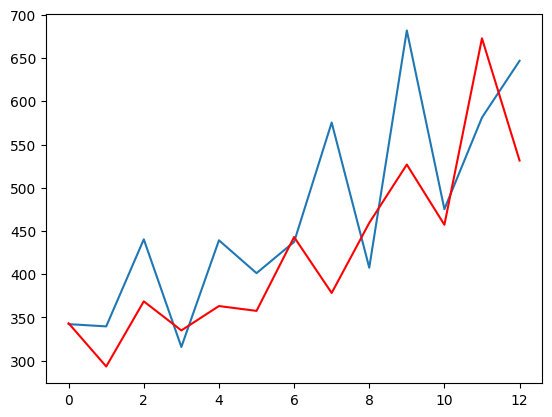

In [ ]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In the picture above, the the expected values (blue) are compared to the rolling forecast predictions (red).